# Data Analysis of IPL 200-2020 Data

In [48]:
! pip install seaborn

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Reading the data file of csv type

In [50]:
data = pd.read_csv("D:\data_science\IPL Matches 2008-2020\IPL Matches 2008-2020.csv")

In [12]:
##How our data will be look like(first five dataset and last five dataset)

In [51]:
data.head(-5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1216542,Dubai,2020-10-08,JM Bairstow,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,69.0,N,NaN,AK Chaudhary,Nitin Menon
807,1216543,Dubai,2020-10-14,A Nortje,Dubai International Cricket Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,13.0,N,NaN,AK Chaudhary,Nitin Menon
808,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,NaN,C Shamshuddin,RK Illingworth
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma


In [15]:
##getting the summary of data, data types, and checking null values

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [17]:
##As in above info the "method" feature have lot of null values which will gonna create difficulties to analyse the data.
##so we need to remove this feature from our data and need to update the data

In [53]:
data.drop("method", axis = 1, inplace = True) ## giving the axis is very important as it tells wether to remove row(0) or column(1).

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


# # Most wins in IPL

In [20]:
wins = pd.DataFrame({"winner" : data['winner']}) ## created a DataFrame 'wins'
count_wins = wins.value_counts()                 ## counted wins of every team
print(count_wins)                               ## printed the wins of every team

winner                     
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


# Ploting a Bar Graph

Text(0.5, 1.0, 'Most Wins in IPL')

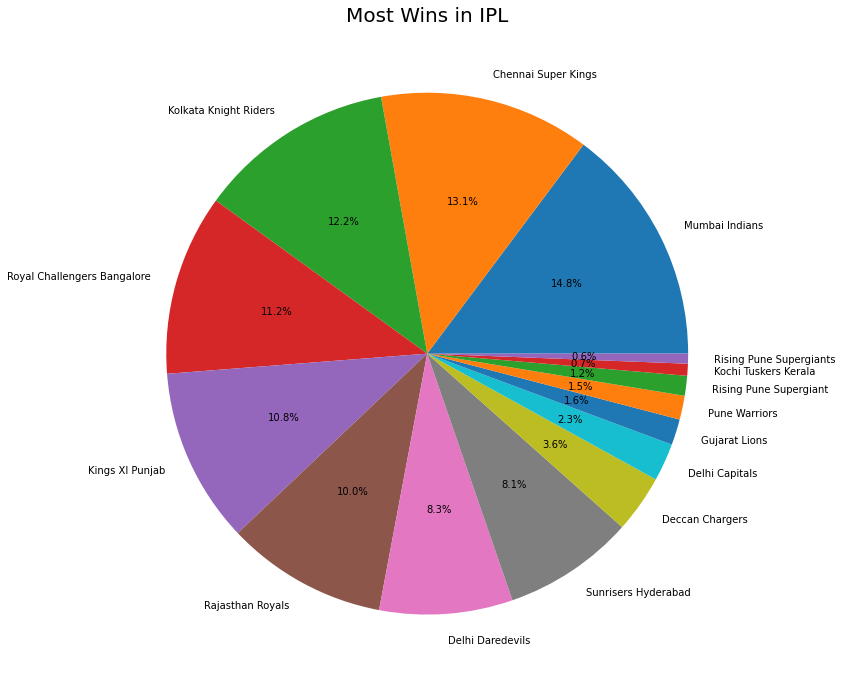

In [55]:
labels = [X[0] for X in count_wins.keys()]
bar, ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x = count_wins,autopct ="%.1f%%" ,  labels = labels)
plt.title("Most Wins in IPL", fontsize = 20)

# Most wins in Eliminator

C:\Users\Monika Pant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(1, 0, 'Kings XI Punjab'),
  Text(2, 0, 'Sunrisers Hyderabad'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Mumbai Indians'),
  Text(5, 0, 'Delhi Capitals'),
  Text(6, 0, 'Kolkata Knight Riders')])

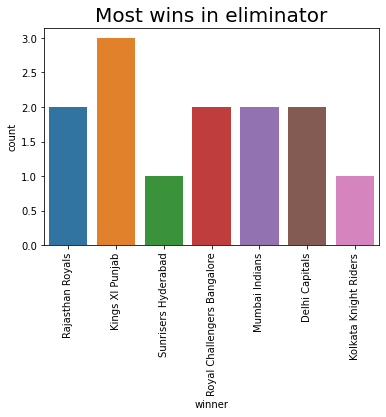

In [56]:
sns.countplot(data['winner'][data['eliminator']=='Y'], data = data)
plt.title("Most wins in eliminator", fontsize = 20)
plt.xticks(rotation = 90)

# Toss Decisions

In [94]:
teams = data['toss_winner'].unique()

#Creating DataFrame
decision_making = pd.DataFrame([], columns = ['Toss Winner', 'Decision', 'Times'])

#Iterating through teams
for id, element in enumerate(teams):
    temp_bat = data[(data['toss_winner'] == element) & (data['toss_decision'] == 'bat')]
    temp_field = data[(data['toss_winner'] == element) & (data['toss_decision'] == 'field')]
    #append to decision making
    decision_making = decision_making.append({'Toss Winner' : element, 'Decision' : 'bat', 'Times' : temp_bat['toss_winner'].count()}, ignore_index = True) 
    decision_making = decision_making.append({'Toss Winner' : element, 'Decision' : 'field', 'Times' : temp_field['toss_winner'].count()}, ignore_index = True)

In [95]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,field,63
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,field,46
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,field,53
6,Mumbai Indians,bat,48
7,Mumbai Indians,field,58
8,Deccan Chargers,bat,24
9,Deccan Chargers,field,19


Text(41.5356802662037, 0.5, 'Toss Decision')

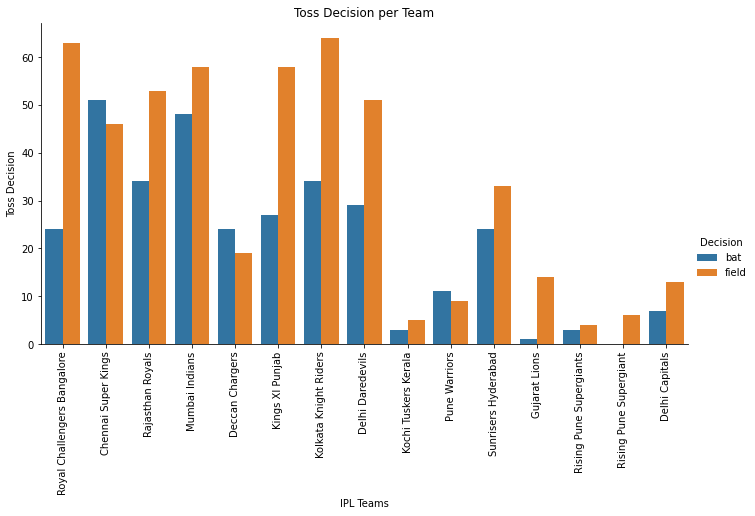

In [96]:
#Creating bar graph
sns.catplot(x = "Toss Winner", y = 'Times', hue = "Decision", data = decision_making, kind = 'bar', height = 5, aspect = 2)

plt.xticks(rotation = 90)

#Title of graph
plt.title("Toss Decision per Team")

#Title of x-axis
plt.xlabel("IPL Teams")

#Title of y-axis
plt.ylabel("Toss Decision")

# Famous Vanues

Text(0, 0.5, 'Venues')

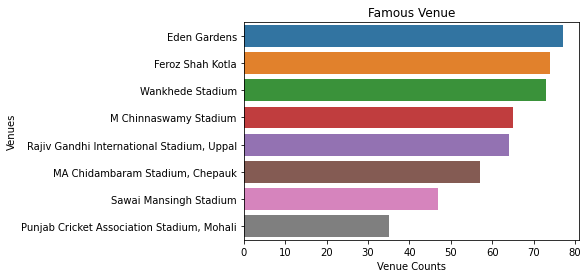

In [101]:
sns.barplot(x = data["venue"].value_counts().head(8).values, y = data["venue"].value_counts().head(8).index, data = data)
plt.title("Famous Venue")
plt.xlabel("Venue Counts")
plt.ylabel("Venues")

# Top 5 Umpire 1

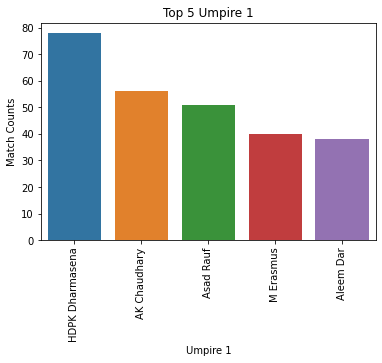

In [105]:
sns.barplot(x = data['umpire1'].value_counts().head().index, y = data['umpire1'].value_counts().head().values, data = data)
plt.title("Top 5 Umpire 1")
plt.xlabel("Umpire 1")
plt.ylabel("Match Counts")
plt.xticks(rotation = 90)
plt.show()

# Top 5 Umpire 2

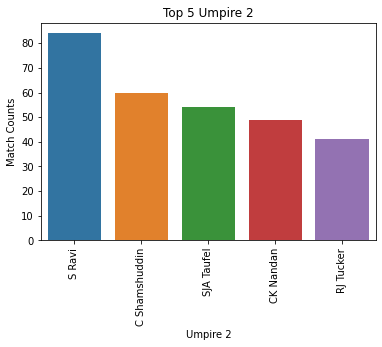

In [107]:
sns.barplot(x = data['umpire2'].value_counts().head().index, y = data['umpire2'].value_counts().head().values, data = data)
plt.title("Top 5 Umpire 2")
plt.xlabel("Umpire 2")
plt.ylabel("Match Counts")
plt.xticks(rotation = 90)
plt.show()